# Introduction to Pandas

In [280]:
import numpy as np
import pandas as pd

In [282]:
print(np.__version__)
print(pd.__version__)

1.21.2
1.3.2


PART-4

# Create DataFrame

In [295]:
a = np.random.randint(1,20,10).reshape(5,2)
df1 = pd.DataFrame(a,columns=["A","B"])
b = np.random.randint(1,20,10).reshape(5,2)
df2 = pd.DataFrame(b,columns=["B","D"])

In [296]:
df1

,A,B
0,2,16
1,14,10
2,17,2
3,19,17
4,1,3


In [297]:
df2

,B,D
0,15,2
1,5,2
2,16,16
3,13,13
4,4,7


# - Merging  dataframes

<div> 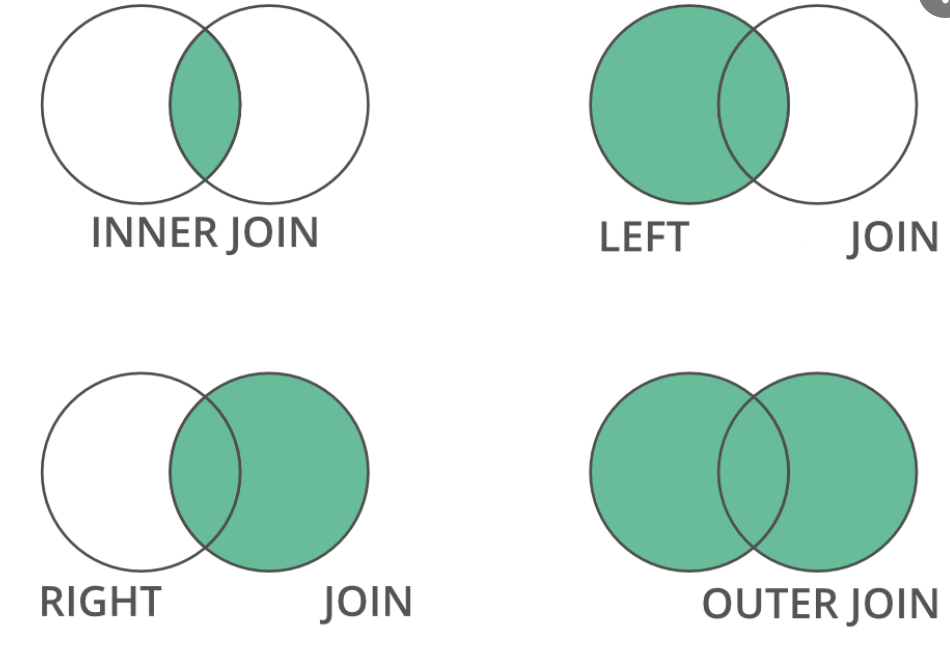 </div>

In [298]:
df1.merge(df2)

,A,B,D
0,2,16,16


In [299]:
df1.merge(df2,how="inner")

,A,B,D
0,2,16,16


In [300]:
df1.merge(df2,how="left")

,A,B,D
0,2,16,16.0
1,14,10,NaN
2,17,2,NaN
3,19,17,NaN
4,1,3,NaN


In [301]:
df1.merge(df2,how="right")

,A,B,D
0,NaN,15,2
1,NaN,5,2
2,2.0,16,16
3,NaN,13,13
4,NaN,4,7


In [302]:
df1.merge(df2,how="outer")

,A,B,D
0,2.0,16,16.0
1,14.0,10,NaN
2,17.0,2,NaN
3,19.0,17,NaN
4,1.0,3,NaN
5,NaN,15,2.0
6,NaN,5,2.0
7,NaN,13,13.0
8,NaN,4,7.0


In [303]:
df1.merge(df2,how="left",indicator=True)

,A,B,D,_merge
0,2,16,16.0,both
1,14,10,NaN,left_only
2,17,2,NaN,left_only
3,19,17,NaN,left_only
4,1,3,NaN,left_only


In [304]:
df1.merge(df2,how="inner",indicator=True)

,A,B,D,_merge
0,2,16,16,both


In [305]:
df1.merge(df2,how="outer",indicator=True)

,A,B,D,_merge
0,2.0,16,16.0,both
1,14.0,10,NaN,left_only
2,17.0,2,NaN,left_only
3,19.0,17,NaN,left_only
4,1.0,3,NaN,left_only
5,NaN,15,2.0,right_only
6,NaN,5,2.0,right_only
7,NaN,13,13.0,right_only
8,NaN,4,7.0,right_only


# - Joining  dataframes

In [306]:
df1

,A,B
0,2,16
1,14,10
2,17,2
3,19,17
4,1,3


In [308]:
df2.columns = ["C","D"]
df2

,C,D
0,15,2
1,5,2
2,16,16
3,13,13
4,4,7


In [310]:
df1.join(df2)

,A,B,C,D
0,2,16,15,2
1,14,10,5,2
2,17,2,16,16
3,19,17,13,13
4,1,3,4,7


In [311]:
df1.join(df2,on="A")

,A,B,C,D
0,2,16,16.0,16.0
1,14,10,NaN,NaN
2,17,2,NaN,NaN
3,19,17,NaN,NaN
4,1,3,5.0,2.0


In [312]:
df1.join(df2,on="A",how="inner")

,A,B,C,D
0,2,16,16,16
4,1,3,5,2


In [313]:
df1.join(df2,on="A",how="right")

,A,B,C,D
NaN,0,NaN,15,2
4.0,1,3.0,5,2
0.0,2,16.0,16,16
NaN,3,NaN,13,13
NaN,4,NaN,4,7


# Concatenating dataframes

In [314]:
df1

,A,B
0,2,16
1,14,10
2,17,2
3,19,17
4,1,3


In [315]:
df2

,C,D
0,15,2
1,5,2
2,16,16
3,13,13
4,4,7


In [316]:
pd.concat([df1,df2])

,A,B,C,D
0,2.0,16.0,NaN,NaN
1,14.0,10.0,NaN,NaN
2,17.0,2.0,NaN,NaN
3,19.0,17.0,NaN,NaN
4,1.0,3.0,NaN,NaN
0,NaN,NaN,15.0,2.0
1,NaN,NaN,5.0,2.0
2,NaN,NaN,16.0,16.0
3,NaN,NaN,13.0,13.0
4,NaN,NaN,4.0,7.0


In [317]:
pd.concat([df1,df2],axis=1)

,A,B,C,D
0,2,16,15,2
1,14,10,5,2
2,17,2,16,16
3,19,17,13,13
4,1,3,4,7


In [318]:
pd.concat([df1,df2],axis=0)

,A,B,C,D
0,2.0,16.0,NaN,NaN
1,14.0,10.0,NaN,NaN
2,17.0,2.0,NaN,NaN
3,19.0,17.0,NaN,NaN
4,1.0,3.0,NaN,NaN
0,NaN,NaN,15.0,2.0
1,NaN,NaN,5.0,2.0
2,NaN,NaN,16.0,16.0
3,NaN,NaN,13.0,13.0
4,NaN,NaN,4.0,7.0


In [319]:
pd.concat([df1,df2],axis=0,ignore_index=True)

,A,B,C,D
0,2.0,16.0,NaN,NaN
1,14.0,10.0,NaN,NaN
2,17.0,2.0,NaN,NaN
3,19.0,17.0,NaN,NaN
4,1.0,3.0,NaN,NaN
5,NaN,NaN,15.0,2.0
6,NaN,NaN,5.0,2.0
7,NaN,NaN,16.0,16.0
8,NaN,NaN,13.0,13.0
9,NaN,NaN,4.0,7.0


# String/Text operation on DataFrame

In [320]:
df = pd.DataFrame(["Pankaj","PaNKaj","PyCSR","PYcsr","TeSt"],columns=["A"])
df

,A
0,Pankaj
1,PaNKaj
2,PyCSR
3,PYcsr
4,TeSt


## len()

In [321]:
df.A.str.len()

0    6
1    6
2    5
3    5
4    4
Name: A, dtype: int64

## lower() / upper()

In [323]:
df.A.str.lower()

0    pankaj
1    pankaj
2     pycsr
3     pycsr
4      test
Name: A, dtype: object

In [324]:
df.A.str.upper()

0    PANKAJ
1    PANKAJ
2     PYCSR
3     PYCSR
4      TEST
Name: A, dtype: object

## strip()

In [327]:
df.A[0] = "    Pankaj       "

In [329]:
df.A

0        Pankaj       
1               PaNKaj
2                PyCSR
3                PYcsr
4                 TeSt
Name: A, dtype: object

In [330]:
df.A.str.strip()

0    Pankaj
1    PaNKaj
2     PyCSR
3     PYcsr
4      TeSt
Name: A, dtype: object

## get_dummies()

In [331]:
df.A.str.get_dummies()

,Pankaj,PYcsr,PaNKaj,PyCSR,TeSt
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,0,1


In [334]:
df.A[4] = "Pankaj"
df

,A
0,Pankaj
1,PaNKaj
2,PyCSR
3,PYcsr
4,Pankaj


In [335]:
df.A.str.get_dummies()

,Pankaj,PYcsr,PaNKaj,Pankaj,PyCSR
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


## cat()

In [338]:
df.A.str.cat(sep="_")

'    Pankaj       _PaNKaj_PyCSR_PYcsr_Pankaj'

## islower() / isupper()

In [339]:
df.A.str.isupper()

0    False
1    False
2    False
3    False
4    False
Name: A, dtype: bool

In [340]:
df.A.str.islower()

0    False
1    False
2    False
3    False
4    False
Name: A, dtype: bool

In [341]:
df.A[0] = "pankaj"

In [342]:
df.A.str.islower()

0     True
1    False
2    False
3    False
4    False
Name: A, dtype: bool

# Groupby operations in DataFrame

In [345]:
df1

,A,B
0,2,16
1,14,10
2,17,2
3,19,17
4,1,3


In [346]:
df2

,C,D
0,15,2
1,5,2
2,16,16
3,13,13
4,4,7


In [349]:
df3 = pd.concat([df1,df2],axis=1)
df3

,A,B,C,D
0,2,16,15,2
1,14,10,5,2
2,17,2,16,16
3,19,17,13,13
4,1,3,4,7


In [351]:
grp = df3.groupby("A")
grp

In [352]:
grp.groups

{1: [4], 2: [0], 14: [1], 17: [2], 19: [3]}

In [353]:
grp2 = df3.groupby("D")
grp2

In [354]:
grp2.groups

{2: [0, 1], 7: [4], 13: [3], 16: [2]}

In [355]:
grp2.get_group(2)

,A,B,C,D
0,2,16,15,2
1,14,10,5,2


## iterating over groups

In [356]:
tmp = grp2.groups
tmp

{2: [0, 1], 7: [4], 13: [3], 16: [2]}

In [361]:
for k in grp2.groups.keys():
    print(k)

2
7
13
16


In [363]:
for k in grp2.groups.keys():
    print(grp2.get_group(k))

    A   B   C  D
0   2  16  15  2
1  14  10   5  2
   A  B  C  D
4  1  3  4  7
    A   B   C   D
3  19  17  13  13
    A  B   C   D
2  17  2  16  16


# Pandas default plot

In [366]:
a = np.random.randint(1,20,50).reshape(25,2)
df = pd.DataFrame(a,columns=["A","B"])
df

,A,B
0,5,9
1,4,7
2,17,10
3,5,14
4,11,4
5,7,8
6,4,17
7,17,19
8,13,1
9,9,11


<AxesSubplot:>

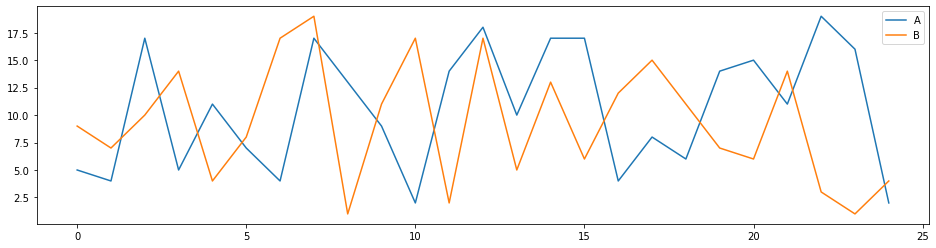

In [368]:
df.plot(kind="line",figsize=(16,4))

<AxesSubplot:>

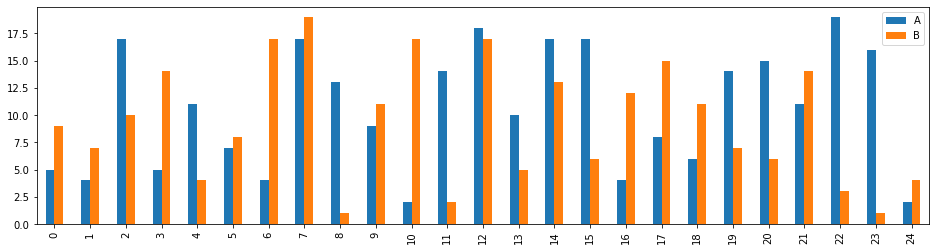

In [369]:
df.plot(kind="bar",figsize=(16,4))

<AxesSubplot:ylabel='Density'>

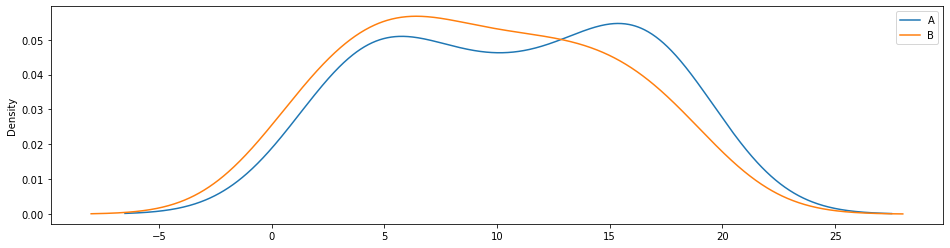

In [370]:
df.plot(kind="kde",figsize=(16,4))

<AxesSubplot:>

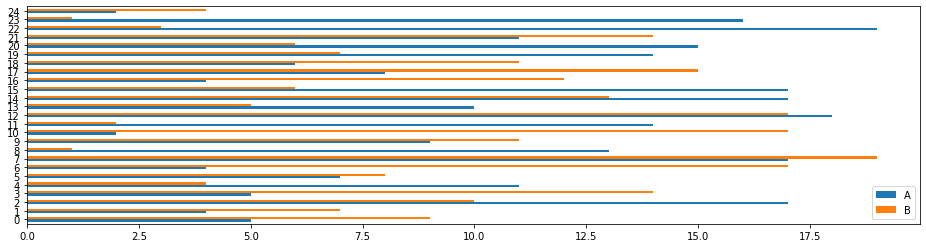

In [371]:
df.plot(kind="barh",figsize=(16,4))

<AxesSubplot:ylabel='Frequency'>

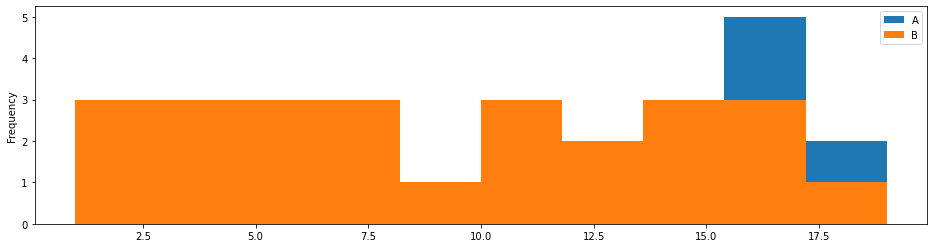

In [372]:
df.plot(kind="hist",figsize=(16,4))

<AxesSubplot:>

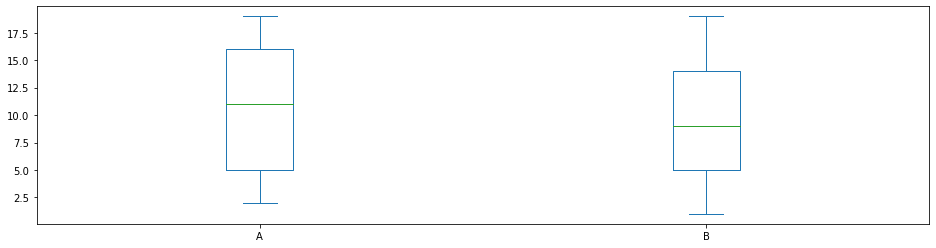

In [376]:
df.plot(kind="box",figsize=(16,4))

# Window functions in dataFramme

In [377]:
a = np.random.randint(1,50,100).reshape(50,2)
df1 = pd.DataFrame(a,columns=["A","B"])
df1

,A,B
0,1,36
1,21,15
2,38,38
3,2,49
4,5,3
5,13,40
6,4,16
7,5,48
8,35,45
9,40,19


In [378]:
df1.rolling(window=3).sum()

,A,B
0,NaN,NaN
1,NaN,NaN
2,60.0,89.0
3,61.0,102.0
4,45.0,90.0
5,20.0,92.0
6,22.0,59.0
7,22.0,104.0
8,44.0,109.0
9,80.0,112.0


<AxesSubplot:>

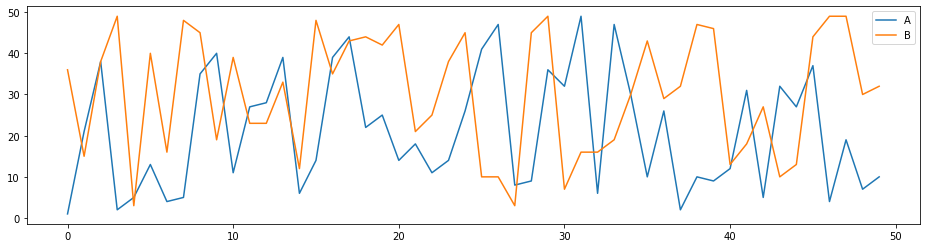

In [380]:
df1.plot(kind="line",figsize=(16,4))

<AxesSubplot:>

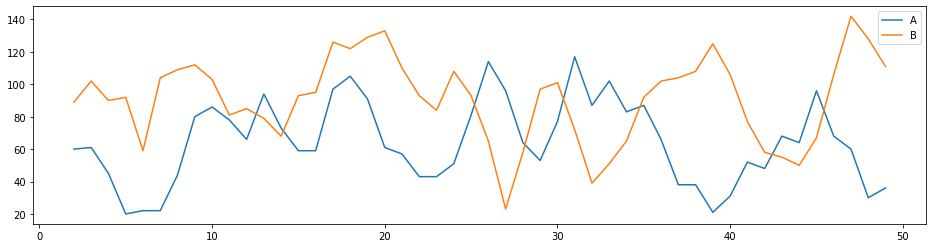

In [382]:
df1.rolling(window=3).sum().plot(kind="line",figsize=(16,4))

<AxesSubplot:>

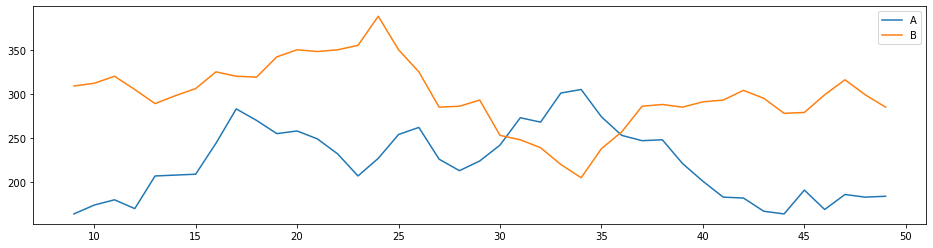

In [383]:
df1.rolling(window=10).sum().plot(kind="line",figsize=(16,4))

<AxesSubplot:>

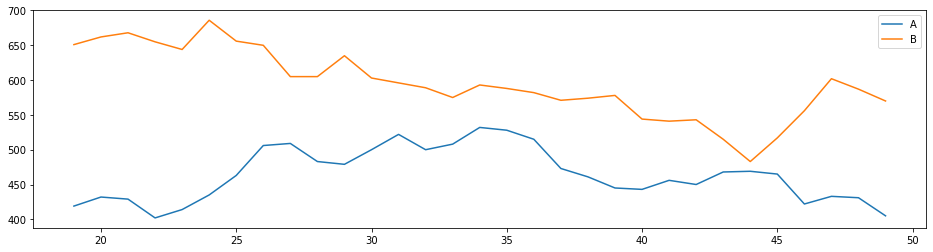

In [384]:
df1.rolling(window=20).sum().plot(kind="line",figsize=(16,4))

<AxesSubplot:>

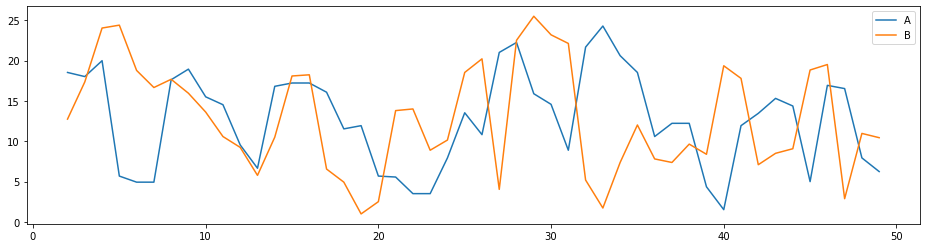

In [385]:
df1.rolling(window=3).std().plot(kind="line",figsize=(16,4))

# Aggregation on DataFrame

In [386]:
r = df.rolling(window=3)
r

Rolling [window=3,center=False,axis=0,method=single]

In [387]:
r.aggregate(np.sum)

,A,B
0,NaN,NaN
1,NaN,NaN
2,26.0,26.0
3,26.0,31.0
4,33.0,28.0
5,23.0,26.0
6,22.0,29.0
7,28.0,44.0
8,34.0,37.0
9,39.0,31.0


In [389]:
r.aggregate([np.sum,np.std,np.var])

A                          B                     
     sum       std        var   sum       std        var
0    NaN       NaN        NaN   NaN       NaN        NaN
1    NaN       NaN        NaN   NaN       NaN        NaN
2   26.0  7.234178  52.333333  26.0  1.527525   2.333333
3   26.0  7.234178  52.333333  31.0  3.511885  12.333333
4   33.0  6.000000  36.000000  28.0  5.033223  25.333333
5   23.0  3.055050   9.333333  26.0  5.033223  25.333333
6   22.0  3.511885  12.333333  29.0  6.658328  44.333333
7   28.0  6.806859  46.333333  44.0  5.859465  34.333333
8   34.0  6.658328  44.333333  37.0  9.865766  97.333333
9   39.0  4.000000  16.000000  31.0  9.018500  81.333333
10  24.0  5.567764  31.000000  29.0  8.082904  65.333333
11  25.0  6.027714  36.333333  30.0  7.549834  57.000000
12  34.0  8.326664  69.333333  36.0  8.660254  75.000000
13  42.0  4.000000  16.000000  24.0  7.937254  63.000000
14  45.0  4.358899  19.000000  35.0  6.110101  37.333333
15  44.0  4.041452  16.333333  24.0  4.358899  19.000000
16  38.0  7.505553  56.333333  31.0  3.785939  14.333333
17  29.0  6.658328  44.333333  33.0  4.582576  21.000000
18  18.0  2.000000   4.000000  38.0  2.081666   4.333333
19  28.0  4.163332  17.333333  33.0  4.000000  16.000000
20  35.0  4.932883  24.333333  24.0  2.645751   7.000000
21  40.0  2.081666   4.333333  27.0  4.358899  19.000000
22  45.0  4.000000  16.000000  23.0  5.686241  32.333333
23  46.0  4.041452  16.333333  18.0  7.000000  49.000000
24  37.0  9.073772  82.333333   8.0  1.527525   2.333333

In [390]:
r.A.aggregate([np.sum,np.std,np.var])

,sum,std,var
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,26.0,7.234178,52.333333
3,26.0,7.234178,52.333333
4,33.0,6.000000,36.000000
5,23.0,3.055050,9.333333
6,22.0,3.511885,12.333333
7,28.0,6.806859,46.333333
8,34.0,6.658328,44.333333
9,39.0,4.000000,16.000000


# Time/Date Functionality for Time Series analysis

In [396]:
pd.date_range("1/1/2020",periods=50,freq="5H")

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 05:00:00',
               '2020-01-01 10:00:00', '2020-01-01 15:00:00',
               '2020-01-01 20:00:00', '2020-01-02 01:00:00',
               '2020-01-02 06:00:00', '2020-01-02 11:00:00',
               '2020-01-02 16:00:00', '2020-01-02 21:00:00',
               '2020-01-03 02:00:00', '2020-01-03 07:00:00',
               '2020-01-03 12:00:00', '2020-01-03 17:00:00',
               '2020-01-03 22:00:00', '2020-01-04 03:00:00',
               '2020-01-04 08:00:00', '2020-01-04 13:00:00',
               '2020-01-04 18:00:00', '2020-01-04 23:00:00',
               '2020-01-05 04:00:00', '2020-01-05 09:00:00',
               '2020-01-05 14:00:00', '2020-01-05 19:00:00',
               '2020-01-06 00:00:00', '2020-01-06 05:00:00',
               '2020-01-06 10:00:00', '2020-01-06 15:00:00',
               '2020-01-06 20:00:00', '2020-01-07 01:00:00',
               '2020-01-07 06:00:00', '2020-01-07 11:00:00',
               '2020-01-

In [398]:
df1.index = pd.date_range("1/1/2022",periods=50)
df1

,A,B
2022-01-01,1,36
2022-01-02,21,15
2022-01-03,38,38
2022-01-04,2,49
2022-01-05,5,3
2022-01-06,13,40
2022-01-07,4,16
2022-01-08,5,48
2022-01-09,35,45
2022-01-10,40,19


# - Importing external data to DataFrame

## reading `CSV` file

## reading `XLSX` file

## reading xlsx file with specific sheet name/number

## reading `HTML` file

## WebScrapping and fetching Table data

# - Exporting DataFrame to external file .csv,.html etc